In [1]:
import os
import numpy as np
import pandas as pd
import datetime 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
sns.set_style("dark")

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")




C:\Users\ABHILASH\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data=pd.read_excel("E:\loan.xlsx")



In [3]:
data.head()
data.shape

(39717, 111)

In [3]:
def removeNulls(dataframe, axis =1, percent=0.3):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

In [4]:
loan = removeNulls(data, axis =1,percent = 0.3)

Number of Columns dropped	:  58

Old dataset rows,columns (39717, 111) 
New dataset rows,columns (39717, 53)


['Fully Paid' 'Charged Off' 'Current']


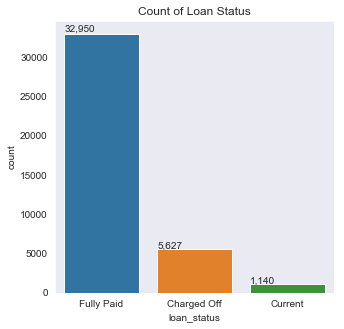

In [5]:
print(data.loan_status.unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data.loan_status)
ax.set_title("Count of Loan Status")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

In [6]:
print(data[['loan_status', 'loan_amnt', 'id']].groupby(['loan_status', 'loan_amnt']).agg(['count']))

                         id
                      count
loan_status loan_amnt      
Charged Off 900           1
            1000         46
            1050          1
            1100          1
            1200         21
            1250          1
            1275          1
            1300          4
            1325          3
            1375          1
            1400          8
            1450          2
            1500         42
            1550          3
            1600         14
            1625          1
            1675          1
            1700          3
            1750          5
            1800         12
            1850          1
            1875          1
            1900          1
            1925          1
            1950          1
            2000         66
            2050          2
            2100         13
            2125          1
            2150          1
...                     ...
Fully Paid  31050         1
            31150   

In [7]:
loan_correlation =loan.corr()
loan_correlation.head()



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.078831,0.086587,0.008731,0.095983,-0.008644,...,0.033426,-0.013359,0.122365,NaN,NaN,NaN,NaN,NaN,-0.009505,NaN
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.074725,0.081025,0.009380,0.096963,-0.008119,...,0.031565,-0.015155,0.123627,NaN,NaN,NaN,NaN,NaN,-0.008769,NaN
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.309415,0.930288,0.271149,0.066439,-0.031864,...,0.135446,0.072853,0.448742,NaN,NaN,NaN,NaN,NaN,-0.037180,NaN
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.312619,0.956159,0.266965,0.066283,-0.032355,...,0.136284,0.074676,0.453133,NaN,NaN,NaN,NaN,NaN,-0.038502,NaN
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.306657,0.905039,0.254375,0.074689,-0.038501,...,0.123759,0.060358,0.442604,NaN,NaN,NaN,NaN,NaN,-0.042746,NaN


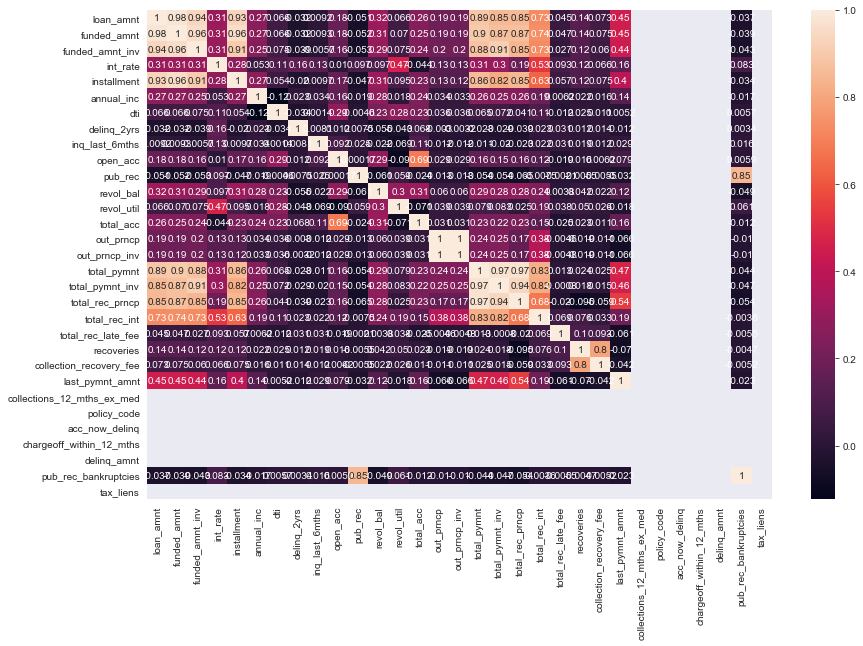

In [16]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot=True)
plt.show()

In [8]:
not_required_columns = ["id","member_id","url","zip_code"]
loan.drop(labels = not_required_columns, axis =1, inplace=True)
print(loan.shape ,"rows & columns.")

(39717, 49) rows & columns.


In [9]:
columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']
loan[columns].apply(pd.to_numeric)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,int_rate,annual_inc,dti
0,5000,5000,4975.00000,162.87,0.1065,24000.00,27.65
1,2500,2500,2500.00000,59.83,0.1527,30000.00,1.00
2,2400,2400,2400.00000,84.33,0.1596,12252.00,8.72
3,10000,10000,10000.00000,339.31,0.1349,49200.00,20.00
4,3000,3000,3000.00000,67.79,0.1269,80000.00,17.94
5,5000,5000,5000.00000,156.46,0.0790,36000.00,11.20
6,7000,7000,7000.00000,170.08,0.1596,47004.00,23.51
7,3000,3000,3000.00000,109.43,0.1864,48000.00,5.35
8,5600,5600,5600.00000,152.39,0.2128,40000.00,5.55
9,5375,5375,5350.00000,121.45,0.1269,15000.00,18.08


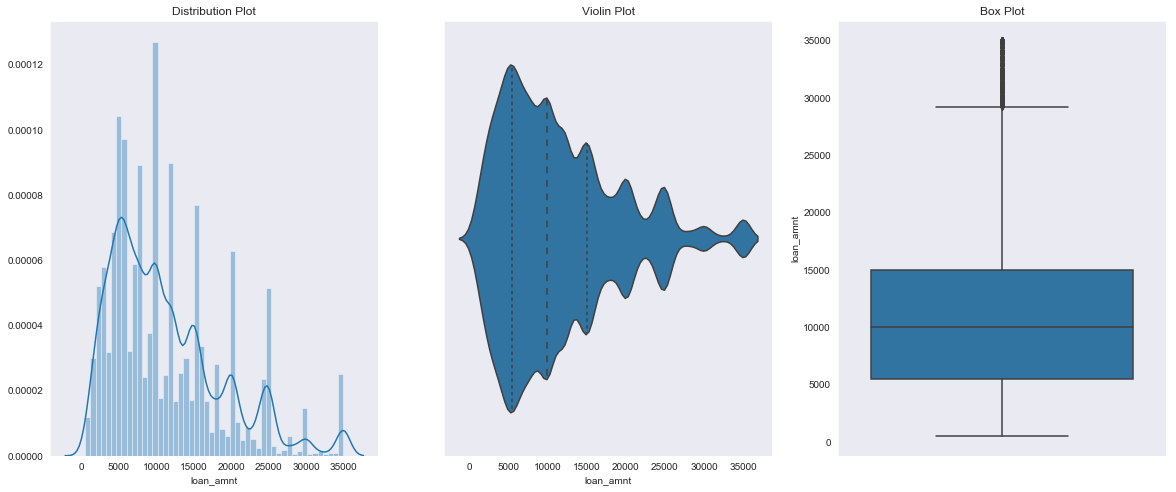

In [11]:
col='loan_amnt'
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(loan[col],ax=ax[0])
ax[1].set_title("Violin Plot")
sns.violinplot(data =loan, x=col,ax=ax[1], inner="quartile")
ax[2].set_title("Box Plot")
sns.boxplot(data =loan, x=col,ax=ax[2],orient='v')        

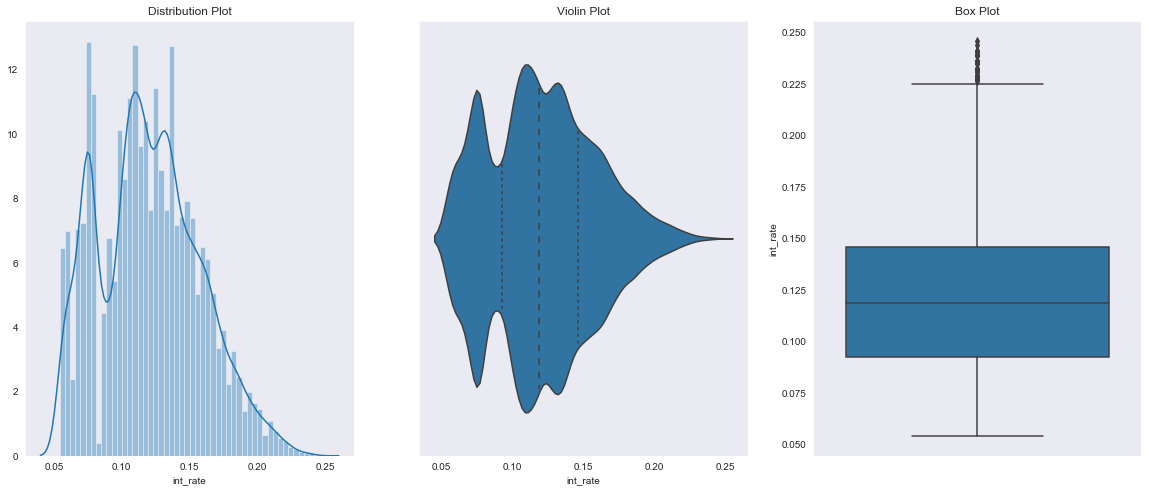

In [12]:
col='int_rate'
fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Distribution Plot")
sns.distplot(loan[col],ax=ax[0])
ax[1].set_title("Violin Plot")
sns.violinplot(data =loan, x=col,ax=ax[1], inner="quartile")
ax[2].set_title("Box Plot")
sns.boxplot(data =loan, x=col,ax=ax[2],orient='v')

NameError: name 'df' is not defined

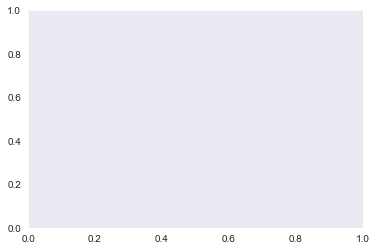

In [10]:
col='purpose'
hue=None
temp = pd.Series(data = hue)
fig, ax = plt.subplots()
width = len(df[col].unique()) + 6 + 4*len(temp.unique())
fig.set_size_inches(width , 7)
ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
if len(temp.unique()) > 0:
    for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
else:
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
del temp

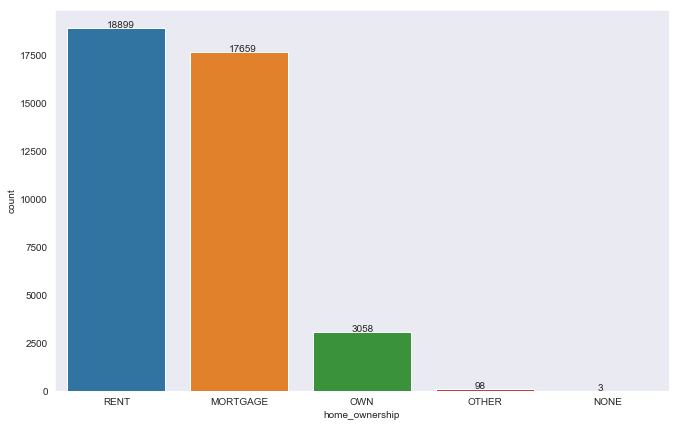

In [89]:
col='home_ownership'
hue=None
temp = pd.Series(data = hue)
fig, ax = plt.subplots()
width = len(df[col].unique()) + 6 + 4*len(temp.unique())
fig.set_size_inches(width , 7)
ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
if len(temp.unique()) > 0:
    for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan))), (p.get_x()+0.05, p.get_height()+20))  
else:
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
del temp

In [101]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
loan[['loan_status']] = labelencoder.fit_transform(loan["loan_status"])
loan[['grade']] = labelencoder.fit_transform(loan['grade'])
loan[['int_rate']] = labelencoder.fit_transform(loan['int_rate'])
#loan['loan_status']
y=loan[['loan_status']]
#X=np.reshape(1, -1)

In [102]:
y=loan[['loan_status']].values
columns=['grade','int_rate']
X=loan[columns]
#columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#X=X_train.reshape(-1, 1)

In [104]:
#X=X_train.reshape(1, -1)
X_train.shape

(26610, 2)

In [105]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [106]:
model.predict(X_test)

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [107]:
model.score(X_test,y_test)

0.8284122987716488